In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns

from matplotlib import pyplot as plt
from matplotlib.pyplot import figure

from sklearn import metrics

%matplotlib inline

# 1.Загрузка Данных

In [ ]:
# df = pd.read_csv('/Users/pavelzelenin/Downloads/creditcard.csv.zip') # для работы локально

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/MIPT ФПМИ DS/3.ML/ДЗ/ДЗ_2/creditcard.csv.zip')

# 2.Исследование данных

In [ ]:
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [ ]:
df.shape

(284807, 31)

## 2.1. Пропуски

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
df.isna().any()

Time      False
V1        False
V2        False
V3        False
V4        False
V5        False
V6        False
V7        False
V8        False
V9        False
V10       False
V11       False
V12       False
V13       False
V14       False
V15       False
V16       False
V17       False
V18       False
V19       False
V20       False
V21       False
V22       False
V23       False
V24       False
V25       False
V26       False
V27       False
V28       False
Amount    False
Class     False
dtype: bool

## 2.3.Дубликаты

In [ ]:
df.drop_duplicates()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [ ]:
df.shape

(284807, 31)

## 2.4. Кодировка данных

In [ ]:
df.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

## 2.5. Посмотрю на признаки Class, Amount, Time

In [ ]:
df.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

Видно, что признаки не сбалансированы. Класс 1 (фрод) много меньше чем класс 0 (обычная транзакция)

In [ ]:
df.Amount.value_counts()

1.00       13688
1.98        6044
0.89        4872
9.99        4747
15.00       3280
           ...  
62.09          1
552.05         1
1467.75        1
196.68         1
95.63          1
Name: Amount, Length: 32767, dtype: int64

In [ ]:
df.Time.value_counts()

163152.0    36
64947.0     26
68780.0     25
3767.0      21
3770.0      20
            ..
127750.0     1
62260.0      1
62259.0      1
127753.0     1
172792.0     1
Name: Time, Length: 124592, dtype: int64

## 2.6. Описательные статистики

In [ ]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


## 2.7. Визуализация

### 2.7.1 plot

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fbf11479510>,
      dtype=object)

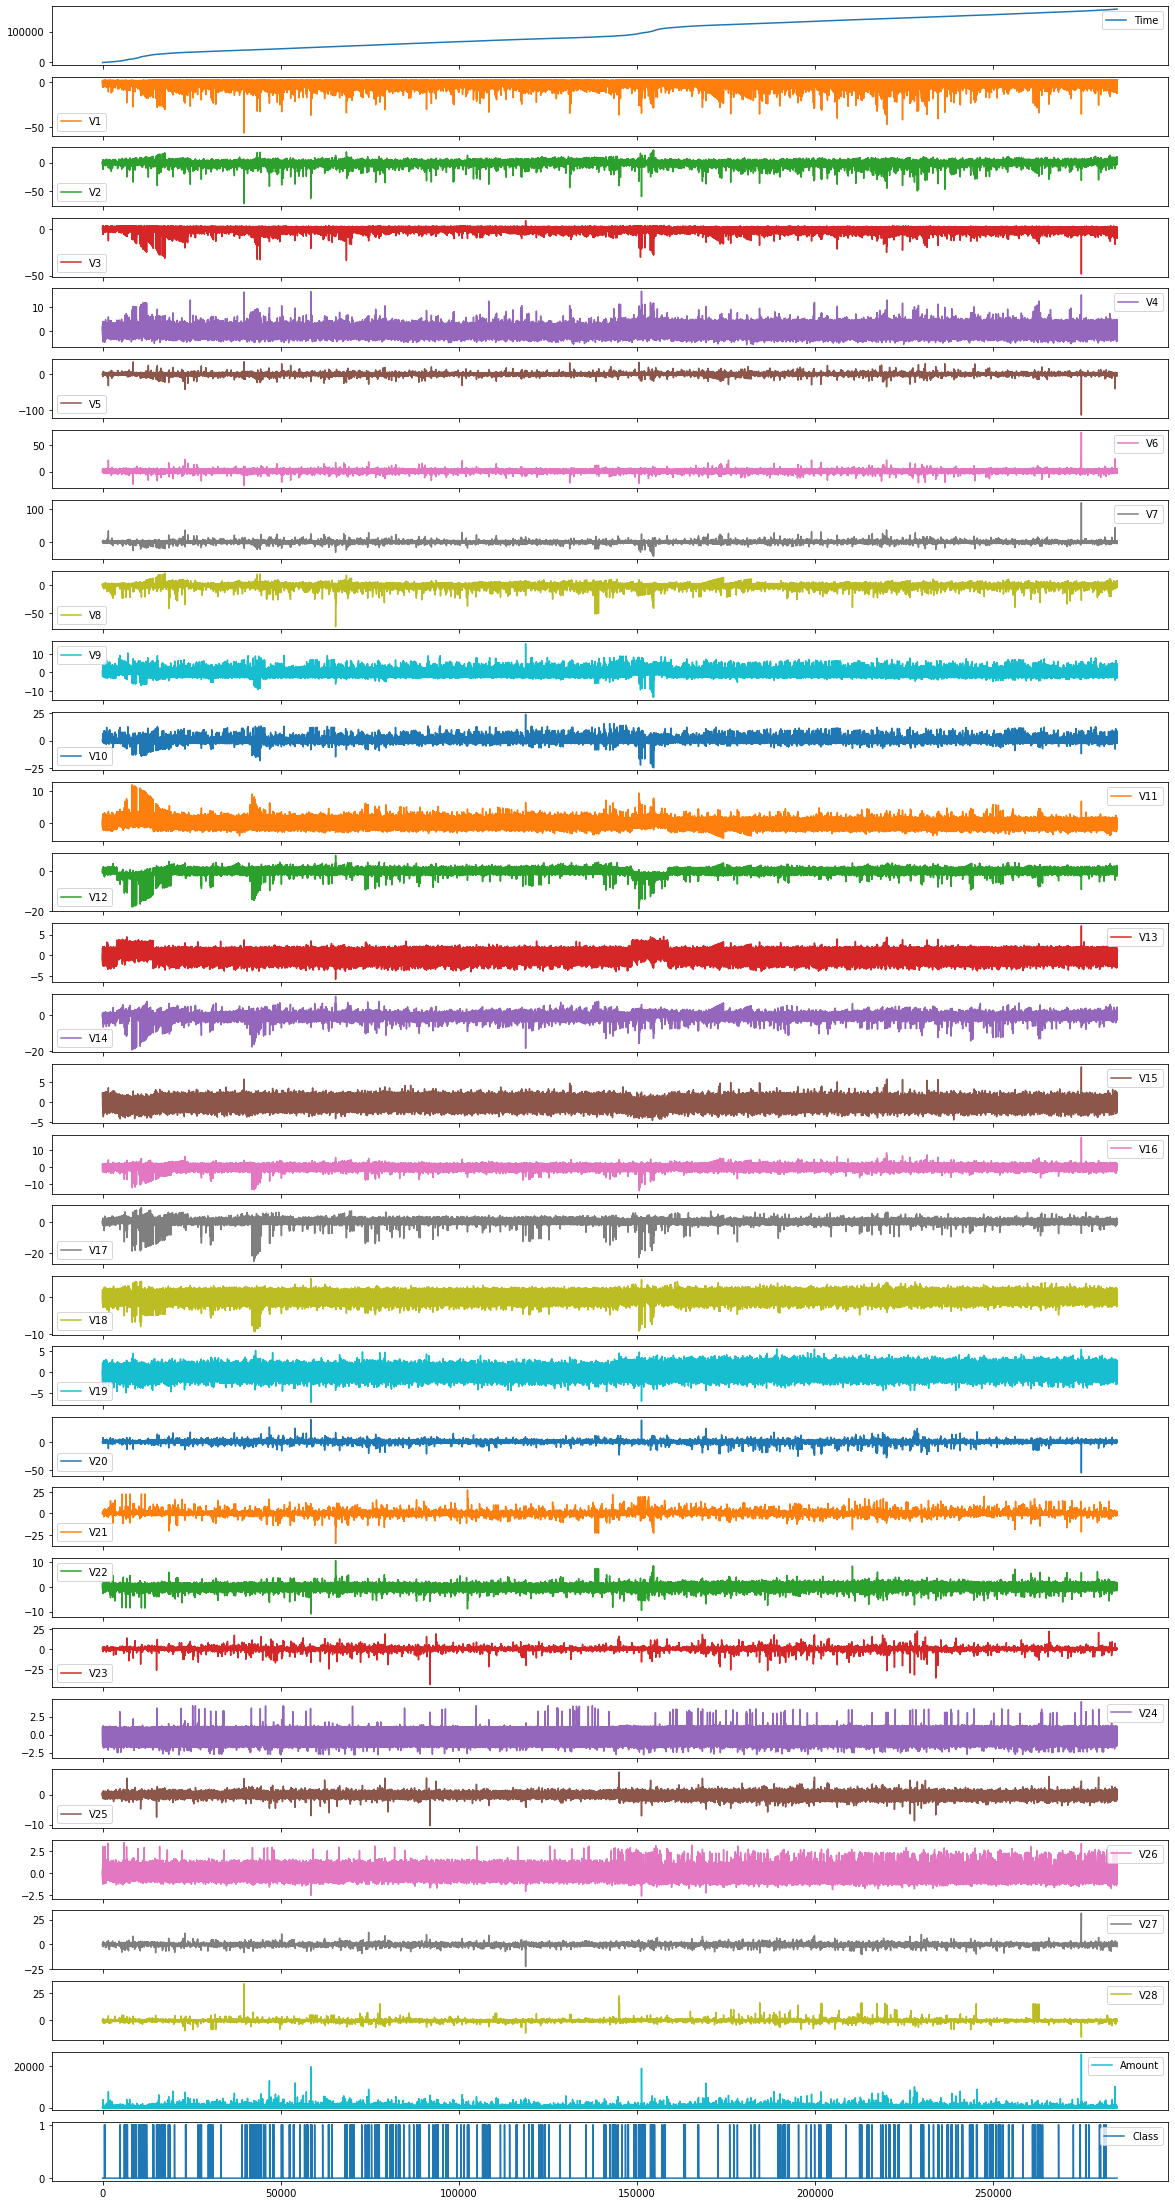

In [ ]:
df.plot(subplots=True, figsize = (20, 40))

Посмотрю отдельно все признаки кроме обезличенных

In [ ]:
main_df = df[['Time','Amount','Class']]

In [ ]:
main_df

,Time,Amount,Class
0,0.0,149.62,0
1,0.0,2.69,0
2,1.0,378.66,0
3,1.0,123.50,0
4,2.0,69.99,0
...,...,...,...
284802,172786.0,0.77,0
284803,172787.0,24.79,0
284804,172788.0,67.88,0
284805,172788.0,10.00,0


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fbf0f919b50>,
      dtype=object)

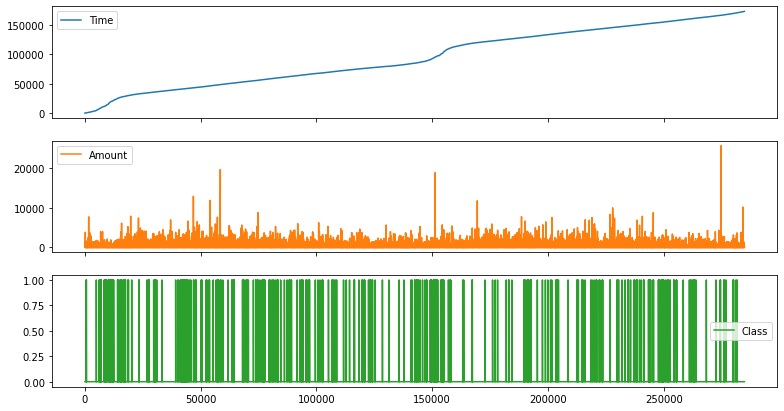

In [ ]:
main_df.plot(figsize = (13,7),subplots = True)

### 2.7.2. Гистограммы

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fbf0f6e1f50>,
      dtype=object)

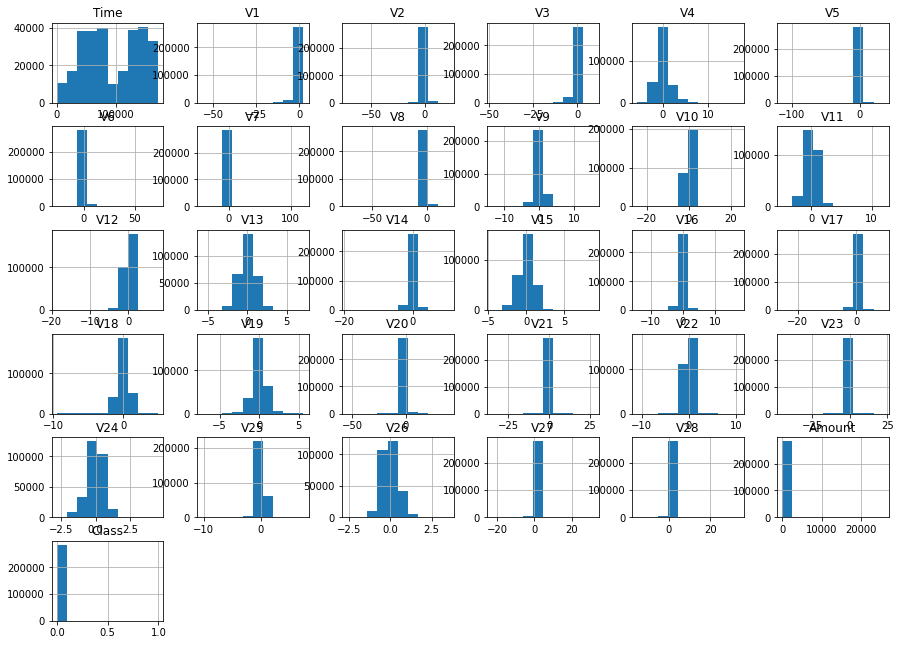

In [ ]:
df.hist(figsize = (15,11))

### 2.7.3 Группировка

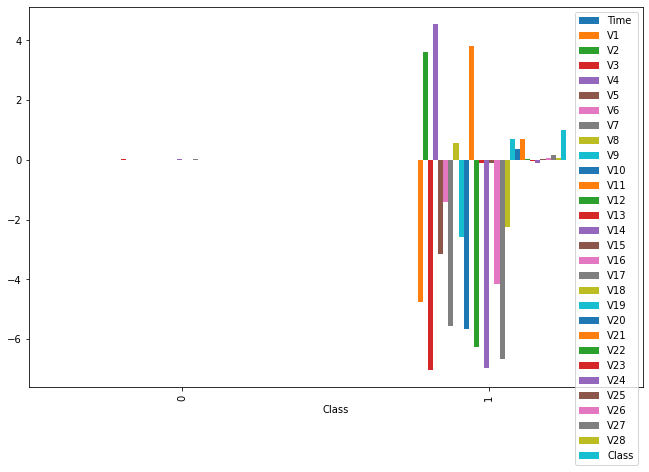

In [ ]:
grouping_columns = df.Class
columns_to_show = df.columns[df.columns != "Amount"]

df.groupby(grouping_columns)[columns_to_show].mean().plot(kind = 'bar',figsize = (11,7))

Видно, что с категорией фрод (класс 1 ) среднее количество признаков V1-V28 много больше чем когда нет фрода ( класс 0)

Визуализируем тот же график, только для класса 1

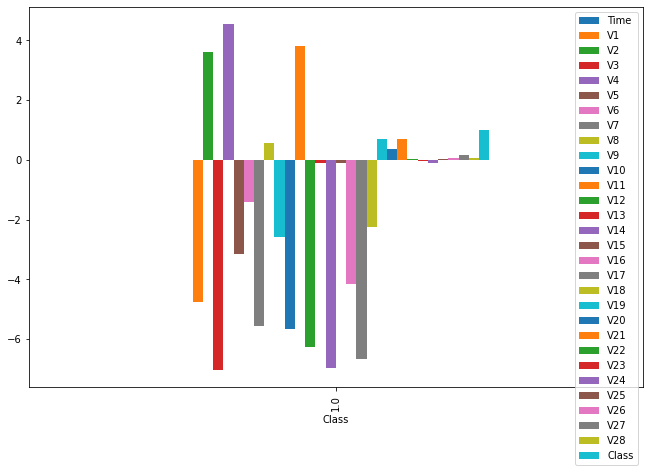

In [ ]:
grouping_columns = df.Class[df.Class == 1]
columns_to_show = df.columns[df.columns != "Amount"]

df.groupby(grouping_columns)[columns_to_show].mean().plot(kind = 'bar',figsize = (11,7))

Визуализируем тот же график, только для класса 0

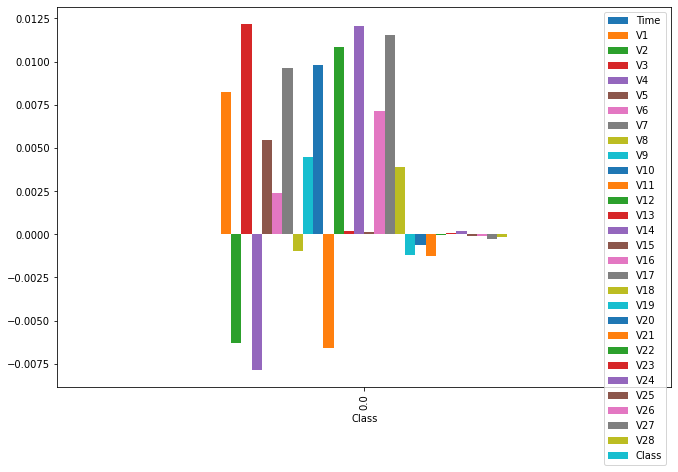

In [ ]:
grouping_columns = df.Class[df.Class == 0]
columns_to_show = df.columns[df.columns != "Amount"]

df.groupby(grouping_columns)[columns_to_show].mean().plot(kind = 'bar',figsize = (11,7))

Можно заметить, что у класса 1 большая часть признаков отрицательна, а у класса 0 наоборот положительна

### 2.7.4. Pairplot

3 признака

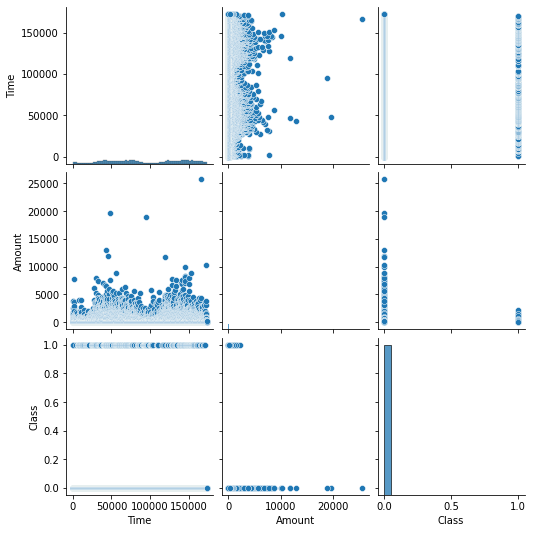

In [ ]:
sns.pairplot(main_df)

### 2.7.5. distplot

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


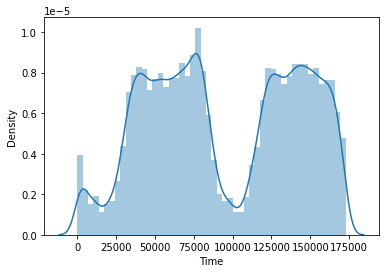

In [ ]:
sns.distplot(df['Time'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


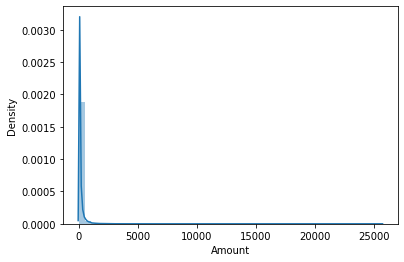

In [ ]:
sns.distplot(df['Amount'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


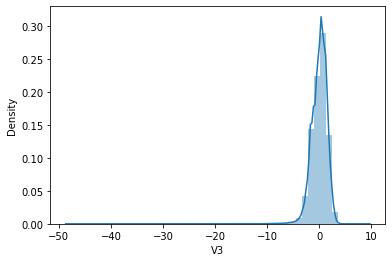

In [ ]:
sns.distplot(df['V3'])

### 2.7.6. jointplot

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


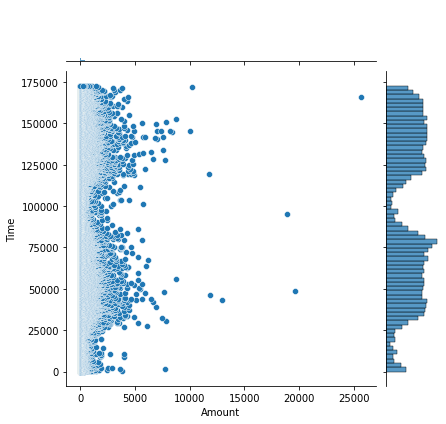

In [ ]:
sns.jointplot(df['Amount'], df['Time'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


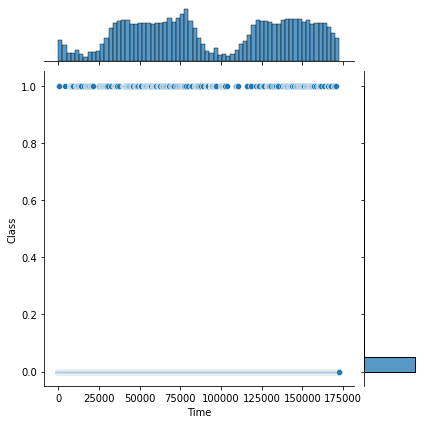

In [ ]:
sns.jointplot(df['Time'], df['Class'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


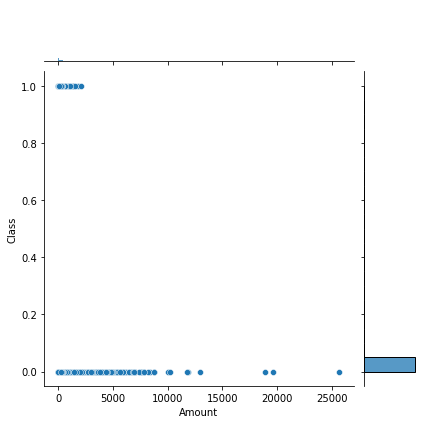

In [ ]:
sns.jointplot(df['Amount'], df['Class'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


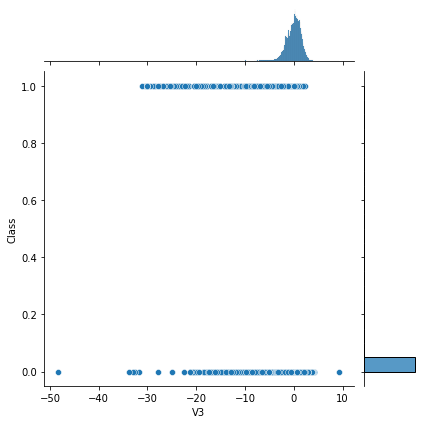

In [ ]:
sns.jointplot(df['V3'], df['Class'])

### 2.7.7. Boxplot

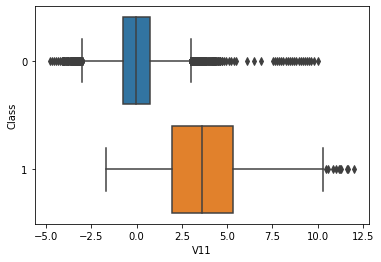

In [ ]:
sns.boxplot(y="Class", x="V11", data=df, orient="h")

### 2.7.8. Матрица корреляций

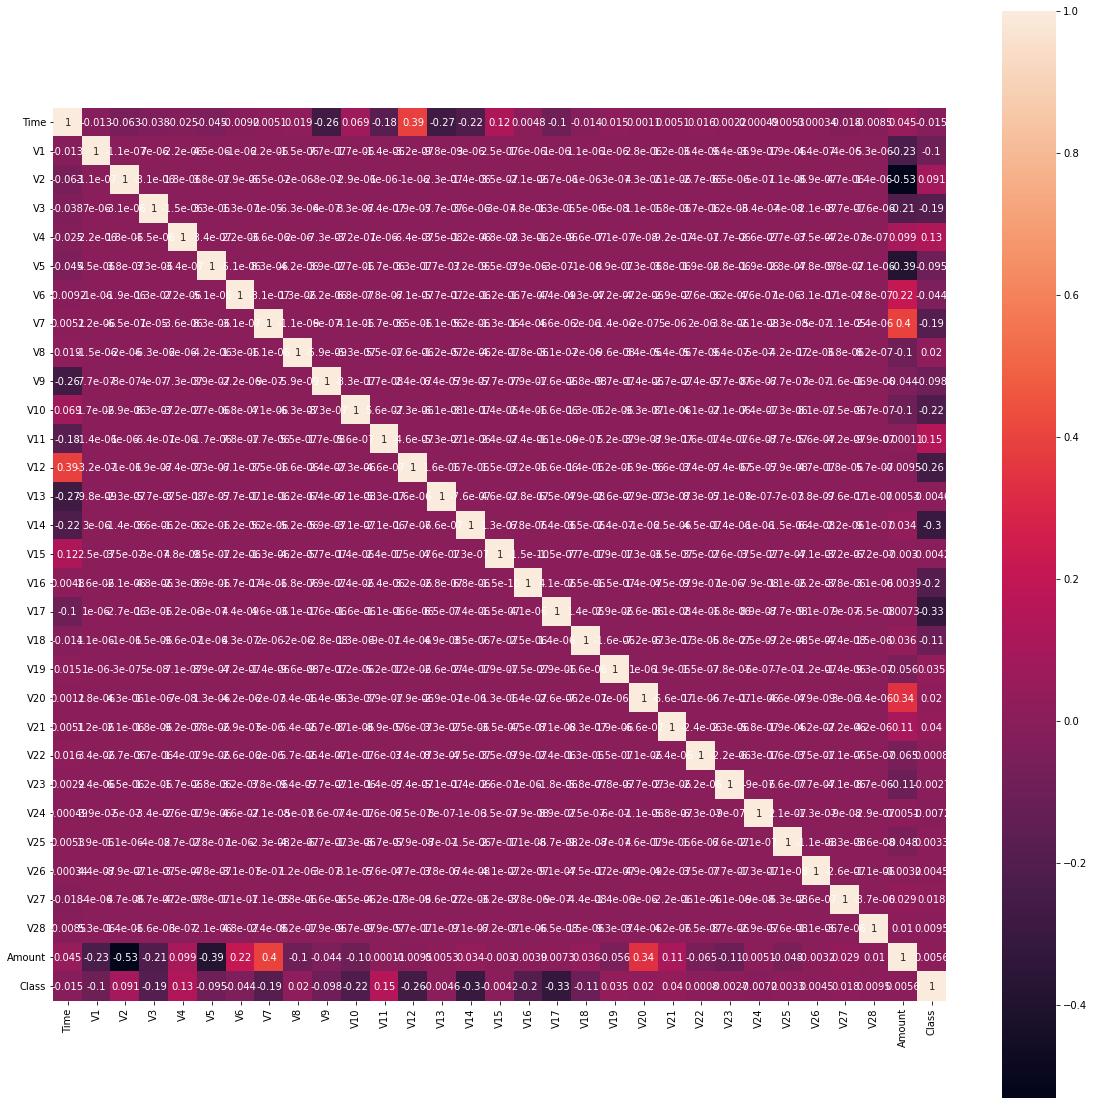

In [ ]:
figure(figsize=(20, 20))
sns.heatmap(df.corr(),annot=True, square=True)

# 3.Предобработка данных

## 3.0. Разбиваем данные на X и y

In [ ]:
X = np.array(df.iloc[:,0:-1]) # слайсим до последнего столбца и преобразовываем в numpy массив
y = df.Class.values # берем последний столбец и преобразовываем в numpy массив с помощью values

In [ ]:
X

array([[ 0.00000000e+00, -1.35980713e+00, -7.27811733e-02, ...,
         1.33558377e-01, -2.10530535e-02,  1.49620000e+02],
       [ 0.00000000e+00,  1.19185711e+00,  2.66150712e-01, ...,
        -8.98309914e-03,  1.47241692e-02,  2.69000000e+00],
       [ 1.00000000e+00, -1.35835406e+00, -1.34016307e+00, ...,
        -5.53527940e-02, -5.97518406e-02,  3.78660000e+02],
       ...,
       [ 1.72788000e+05,  1.91956501e+00, -3.01253846e-01, ...,
         4.45477214e-03, -2.65608286e-02,  6.78800000e+01],
       [ 1.72788000e+05, -2.40440050e-01,  5.30482513e-01, ...,
         1.08820735e-01,  1.04532821e-01,  1.00000000e+01],
       [ 1.72792000e+05, -5.33412522e-01, -1.89733337e-01, ...,
        -2.41530880e-03,  1.36489143e-02,  2.17000000e+02]])

In [ ]:
y

array([0, 0, 0, ..., 0, 0, 0])

## 3.1.One-hot/label encoder не нужен, тк в датасете признаки имеют бинарный и числовой тип данных 

## 3.2 Разбиваем на треин и тест

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# 4.Пайплайн 

## 4.1 Настрою пайплайн и обучу модель

In [ ]:
from sklearn.pipeline import Pipeline # конвейер обработки
from sklearn.model_selection import GridSearchCV # грид серч
from sklearn.linear_model import LogisticRegression # Логистическая регрессия
from sklearn.preprocessing import StandardScaler, MinMaxScaler

Буду использовать в пайплайне порядок: Нормализация, ЛогРег

In [ ]:
estimators = [
  ('scaler', StandardScaler()),
  ('classifier', LogisticRegression())
]

pipe = Pipeline(estimators)
pipe.named_steps

{'scaler': StandardScaler(), 'classifier': LogisticRegression()}

Переберу 2 способа нормализации и несколько параметров для классификатора

In [ ]:
parameters = {
  'scaler': [StandardScaler(), MinMaxScaler()],
  'classifier__penalty' : ['l1', 'l2', 'elasticnet'],
  'classifier__C' : np.arange(0.1,1.5,0.5), # inverse of regularization strength
  'classifier__solver' : ['saga'], # только saga принимает все виды пенальти
  'classifier__l1_ratio' : np.arange(0.0,1.0,5.0)
}

In [ ]:
grid = GridSearchCV(pipe, parameters, n_jobs = -1, verbose = 2,cv = 5)
grid.fit(X_train, y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1479: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('classifier', LogisticRegression())]),
             n_jobs=-1,
             param_grid={'classifier__C': array([0.1, 0.6, 1.1]),
                         'classifier__l1_ratio': array([0.]),
                         'classifier__penalty': ['l1', 'l2', 'elasticnet'],
                         'classifier__solver': ['saga'],
                         'scaler': [StandardScaler(), MinMaxScaler()]},
             verbose=2)

Несколь раз пытался в параметрах поставить Max_iter со 100 до 500, все равно ошибка вылетает (как выше) "ConvergenceWarning: The max_iter was reached which means the coef_ did not converge". Дальше не стал увеличивать, тк и так долго считалось.


In [ ]:
grid.best_params_

{'classifier__C': 0.1,
 'classifier__l1_ratio': 0.0,
 'classifier__penalty': 'l2',
 'classifier__solver': 'saga',
 'scaler': StandardScaler()}

In [ ]:
grid.best_estimator_

Pipeline(steps=[('scaler', StandardScaler()),
                ('classifier',
                 LogisticRegression(C=0.1, l1_ratio=0.0, solver='saga'))])

In [ ]:
grid.best_score_

0.9991924334525665

Classificatin report из Grid Search'a для train data

In [ ]:
print(metrics.classification_report(y_train,grid.best_estimator_.predict(X_train)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227447
           1       0.89      0.62      0.73       398

    accuracy                           1.00    227845
   macro avg       0.95      0.81      0.87    227845
weighted avg       1.00      1.00      1.00    227845



Classificatin report из Grid Search'a для test data

In [ ]:
print(metrics.classification_report(y_test,grid.best_estimator_.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56868
           1       0.84      0.60      0.70        94

    accuracy                           1.00     56962
   macro avg       0.92      0.80      0.85     56962
weighted avg       1.00      1.00      1.00     56962



## 4.2. Визуализирую результат работы Грид Серч

In [ ]:
result_df = pd.DataFrame.from_dict(grid.cv_results_, orient='columns')
result_df.columns

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_classifier__C', 'param_classifier__l1_ratio',
       'param_classifier__penalty', 'param_classifier__solver', 'param_scaler',
       'params', 'split0_test_score', 'split1_test_score', 'split2_test_score',
       'split3_test_score', 'split4_test_score', 'mean_test_score',
       'std_test_score', 'rank_test_score'],
      dtype='object')

In [ ]:
result_df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_classifier__C,param_classifier__l1_ratio,param_classifier__penalty,param_classifier__solver,param_scaler,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,22.469101,0.102909,0.016925,0.002554,0.1,0.0,l1,saga,StandardScaler(),"{'classifier__C': 0.1, 'classifier__l1_ratio':...",0.999210,0.999166,0.999386,0.999034,0.999144,0.999188,0.000114,6
1,21.157143,0.852169,0.015273,0.000695,0.1,0.0,l1,saga,MinMaxScaler(),"{'classifier__C': 0.1, 'classifier__l1_ratio':...",0.998991,0.998903,0.999188,0.998837,0.999012,0.998986,0.000119,16
2,18.493334,0.594960,0.017918,0.005421,0.1,0.0,l2,saga,StandardScaler(),"{'classifier__C': 0.1, 'classifier__l1_ratio':...",0.999210,0.999166,0.999407,0.999012,0.999166,0.999192,0.000127,1
3,8.232032,0.411201,0.014466,0.000320,0.1,0.0,l2,saga,MinMaxScaler(),"{'classifier__C': 0.1, 'classifier__l1_ratio':...",0.998596,0.998486,0.998727,0.998574,0.998617,0.998600,0.000078,17
4,19.986566,0.760734,0.015390,0.000349,0.1,0.0,elasticnet,saga,StandardScaler(),"{'classifier__C': 0.1, 'classifier__l1_ratio':...",0.999210,0.999166,0.999407,0.999012,0.999166,0.999192,0.000127,1


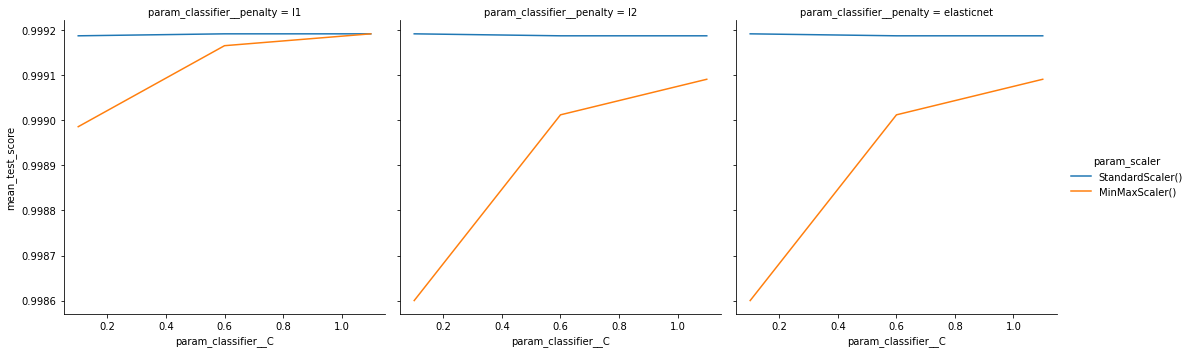

In [ ]:
sns.relplot(data=result_df,
	kind='line',
	x='param_classifier__C',
	y='mean_test_score',
	hue='param_scaler',
	col='param_classifier__penalty')
plt.show()

## 4.3. Метрики

Гридсерч использовал скор метрику accuracy_score, хотя судя по доке если использовать логистическую регрессию, то автоматически должен был бы использовать r2_score ([документация](https://scikit-learn.org/stable/modules/grid_search.html#specifying-an-objective-metric))

In [ ]:
grid.score(X_train, y_train)

0.999188044503939

In [ ]:
from sklearn import metrics

In [ ]:
metrics.accuracy_score(y_train, grid.predict(X_train))

0.999188044503939

Метрики с лучшими параметрами из Грид Серч на Треин данных

In [ ]:
print(f'R_2 = {metrics.r2_score(y_train, grid.predict(X_train))}')
print(f'MSE = {metrics.mean_squared_error(y_train, grid.predict(X_train))}')
print(f'MAE = {metrics.mean_absolute_error(y_train, grid.predict(X_train))}')
print(f'MedAE = {metrics.median_absolute_error(y_train, grid.predict(X_train))}')

R_2 = 0.544430340864876
MSE = 0.0007943997015514933
MAE = 0.0007943997015514933
MedAE = 0.0


Метрики с лучшими параметрами из Грид Серч на Тестовых данных

In [ ]:
print(f'R_2 = {metrics.r2_score(y_test, grid.predict(X_test))}')
print(f'MSE = {metrics.mean_squared_error(y_test, grid.predict(X_test))}')
print(f'MAE = {metrics.mean_absolute_error(y_test, grid.predict(X_test))}')
print(f'MedAE = {metrics.median_absolute_error(y_test, grid.predict(X_test))}')

R_2 = 0.47786175974522593
MSE = 0.0008602226045433798
MAE = 0.0008602226045433798
MedAE = 0.0


# 5.Пайплайн с учетом аугментации данных

## 5.1 Настрою пайплайн и обучу модель

In [ ]:
# новый пайплайн из библиотеки для работы с дисбанасированными данными
from imblearn.pipeline import Pipeline

# методы устранения дисбаланса в данных
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import ADASYN 

#те же библиотеки что имопртировал до этого
from sklearn.model_selection import GridSearchCV # грид серч
from sklearn.linear_model import LogisticRegression # Логистическая регрессия
from sklearn.preprocessing import StandardScaler, MinMaxScaler


In [ ]:
estimators = [
  ('scaler', StandardScaler()),
  ('sampling_method', SMOTE(random_state=42)),
  ('classifier', LogisticRegression())
]

imb_pipe = Pipeline(estimators)
imb_pipe.named_steps

{'scaler': StandardScaler(),
 'sampling_method': SMOTE(random_state=42),
 'classifier': LogisticRegression()}

Возьму только SMOTE и ADASYN. TomekLinks - очень долго считался , поэтому не стал его брать

In [ ]:
parameters = {
  'sampling_method' : [SMOTE(random_state=42),ADASYN(random_state=42)]
}

In [ ]:
parameters = {
  'scaler': [StandardScaler(), MinMaxScaler()],
  'sampling_method' : [SMOTE(random_state=42),ADASYN(random_state=42)],
  'classifier__penalty' : ['l1', 'l2', 'elasticnet'],
  'classifier__C' : np.arange(0.1,1.5,0.5), # inverse of regularization strength
  'classifier__solver' : ['saga'], # только saga принимает все виды пенальти
  'classifier__l1_ratio' : np.arange(0.0,1.0,5.0)
}

In [ ]:
grid = GridSearchCV(imb_pipe, parameters, n_jobs = -1, verbose = 2,cv = 3)
grid.fit(X_train, y_train)

Fitting 3 folds for each of 36 candidates, totalling 108 fits


/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:703: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1479: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty)


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('sampling_method',
                                        SMOTE(random_state=42)),
                                       ('classifier', LogisticRegression())]),
             n_jobs=-1,
             param_grid={'classifier__C': array([0.1, 0.6, 1.1]),
                         'classifier__l1_ratio': array([0.]),
                         'classifier__penalty': ['l1', 'l2', 'elasticnet'],
                         'classifier__solver': ['saga'],
                         'sampling_method': [SMOTE(random_state=42),
                                             ADASYN(random_state=42)],
                         'scaler': [StandardScaler(), MinMaxScaler()]},
             verbose=2)

Получили бест параметры:

In [ ]:
grid.best_params_

{'classifier__C': 0.1,
 'classifier__l1_ratio': 0.0,
 'classifier__penalty': 'l2',
 'classifier__solver': 'saga',
 'sampling_method': SMOTE(random_state=42),
 'scaler': MinMaxScaler()}

In [ ]:
grid.best_estimator_

Pipeline(steps=[('scaler', MinMaxScaler()),
                ('sampling_method', SMOTE(random_state=42)),
                ('classifier',
                 LogisticRegression(C=0.1, l1_ratio=0.0, solver='saga'))])

In [ ]:
grid.best_score_

0.9817200306229563

Classificatin report из Grid Search'a для train data

In [ ]:
print(metrics.classification_report(y_train,grid.best_estimator_.predict(X_train)))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99    227447
           1       0.08      0.91      0.15       398

    accuracy                           0.98    227845
   macro avg       0.54      0.95      0.57    227845
weighted avg       1.00      0.98      0.99    227845



Classificatin report из Grid Search'a для test data

In [ ]:
print(metrics.classification_report(y_test,grid.best_estimator_.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56868
           1       0.07      0.88      0.13        94

    accuracy                           0.98     56962
   macro avg       0.54      0.93      0.56     56962
weighted avg       1.00      0.98      0.99     56962



## 5.2 Визуализирую результат работы Грид Серч

In [ ]:
result_df = pd.DataFrame.from_dict(grid.cv_results_, orient='columns')
result_df.columns

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_classifier__C', 'param_classifier__l1_ratio',
       'param_classifier__penalty', 'param_classifier__solver',
       'param_sampling_method', 'param_scaler', 'params', 'split0_test_score',
       'split1_test_score', 'split2_test_score', 'mean_test_score',
       'std_test_score', 'rank_test_score'],
      dtype='object')

In [ ]:
result_df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_classifier__C,param_classifier__l1_ratio,param_classifier__penalty,param_classifier__solver,param_sampling_method,param_scaler,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,39.465486,0.350223,0.025126,0.000536,0.1,0.0,l1,saga,SMOTE(random_state=42),StandardScaler(),"{'classifier__C': 0.1, 'classifier__l1_ratio':...",0.972626,0.973021,0.978196,0.974614,0.002537,12
1,37.433373,2.634502,0.025408,0.000929,0.1,0.0,l1,saga,SMOTE(random_state=42),MinMaxScaler(),"{'classifier__C': 0.1, 'classifier__l1_ratio':...",0.974088,0.976510,0.978512,0.976370,0.001809,7
2,39.759443,0.209220,0.026874,0.000767,0.1,0.0,l1,saga,ADASYN(random_state=42),StandardScaler(),"{'classifier__C': 0.1, 'classifier__l1_ratio':...",0.919775,0.919695,0.923948,0.921139,0.001986,30
3,39.772113,0.291489,0.024973,0.002710,0.1,0.0,l1,saga,ADASYN(random_state=42),MinMaxScaler(),"{'classifier__C': 0.1, 'classifier__l1_ratio':...",0.923383,0.932480,0.932691,0.929518,0.004339,23
4,32.673344,0.162662,0.025290,0.000094,0.1,0.0,l2,saga,SMOTE(random_state=42),StandardScaler(),"{'classifier__C': 0.1, 'classifier__l1_ratio':...",0.972561,0.973061,0.978248,0.974623,0.002571,10


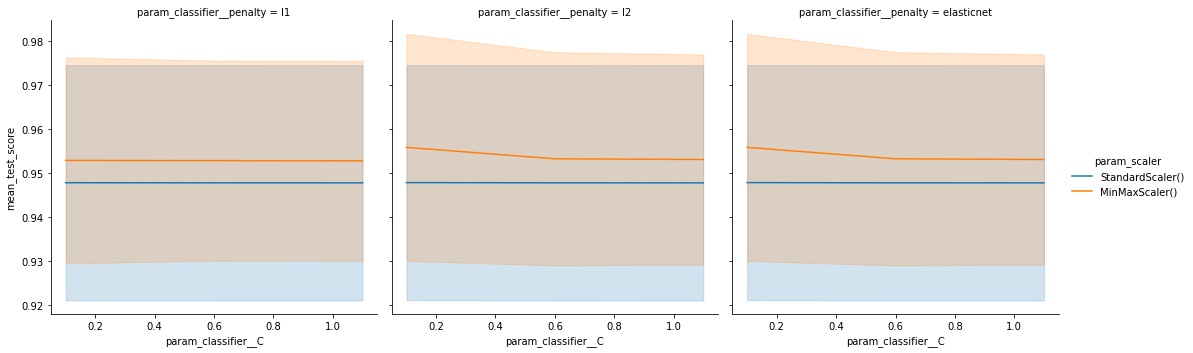

In [ ]:
sns.relplot(data=result_df,
	kind='line',
	x='param_classifier__C',
	y='mean_test_score',
	hue='param_scaler',
	col='param_classifier__penalty')
plt.show()

## 5.3 Метрики

Метрики с лучшими параметрами из Грид Серч на Треин данных

In [ ]:
print(f'R_2 = {metrics.r2_score(y_train, grid.predict(X_train))}')
print(f'MSE = {metrics.mean_squared_error(y_train, grid.predict(X_train))}')
print(f'MAE = {metrics.mean_absolute_error(y_train, grid.predict(X_train))}')
print(f'MedAE = {metrics.median_absolute_error(y_train, grid.predict(X_train))}')

R_2 = -9.259126688589866
MSE = 0.017889354605104348
MAE = 0.017889354605104348
MedAE = 0.0


Метрики с лучшими параметрами из Грид Серч на Тестовых данных

In [ ]:
print(f'R_2 = {metrics.r2_score(y_test, grid.predict(X_test))}')
print(f'MSE = {metrics.mean_squared_error(y_test, grid.predict(X_test))}')
print(f'MAE = {metrics.mean_absolute_error(y_test, grid.predict(X_test))}')
print(f'MedAE = {metrics.median_absolute_error(y_test, grid.predict(X_test))}')

R_2 = -10.348514813700703
MSE = 0.01869667497629999
MAE = 0.01869667497629999
MedAE = 0.0


Вижу что R2_score отрицательный. Получается что у меня горизонтальная линия лучше описывает данные чем линия регреессии

## 5.4 Вручную обучу модель с лучшими параметрами из Грид Серч

На всякий случай

In [ ]:
estimators = [
  ('scaler', MinMaxScaler()),
  ('sampling_method', SMOTE(random_state=42)),
  ('classifier', LogisticRegression(C=0.1, penalty='l2', solver='saga'))
]

imb_pipe = Pipeline(estimators)
imb_pipe.named_steps

{'scaler': MinMaxScaler(),
 'sampling_method': SMOTE(random_state=42),
 'classifier': LogisticRegression(C=0.1, solver='saga')}

In [ ]:
imb_pipe.fit(X_train, y_train)
y_pred = imb_pipe.predict(X_test)
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56868
           1       0.07      0.88      0.13        94

    accuracy                           0.98     56962
   macro avg       0.54      0.93      0.56     56962
weighted avg       1.00      0.98      0.99     56962



In [ ]:
from imblearn.metrics import classification_report_imbalanced
print(classification_report_imbalanced(y_test, y_pred))

                   pre       rec       spe        f1       geo       iba       sup

          0       1.00      0.98      0.88      0.99      0.93      0.88     56868
          1       0.07      0.88      0.98      0.13      0.93      0.86        94

avg / total       1.00      0.98      0.88      0.99      0.93      0.88     56962



Так же метрика precision для 1го класса очень низкая, т.е модель плохо отличает этот класс от другого.

На удивление recall высокий, что означает способность модели находить класс вообще

In [ ]:
print(f'R_2 = {metrics.r2_score(y_test, y_pred)}')
print(f'MSE = {metrics.mean_squared_error(y_test, y_pred)}')
print(f'MAE = {metrics.mean_absolute_error(y_test, y_pred)}')
print(f'MedAE = {metrics.median_absolute_error(y_test, y_pred)}')

R_2 = -10.348514813700703
MSE = 0.01869667497629999
MAE = 0.01869667497629999
MedAE = 0.0


R2_score отрицательный так же.

Почему-то значения метрик у меня в данном случае хуже чем без аугментации. Видимо где - то ошибка.

# 6.Еще попытки

## 6.1 Попытка добавить class_weight в логрег и  strattify в train_test_split

In [ ]:
# новый пайплайн из библиотеки для работы с дисбанасированными данными
from imblearn.pipeline import Pipeline

# методы устранения дисбаланса в данных
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import ADASYN 

#те же библиотеки что имопртировал до этого
from sklearn.model_selection import GridSearchCV # грид серч
from sklearn.linear_model import LogisticRegression # Логистическая регрессия
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify = y)

In [ ]:
estimators = [
  ('scaler', MinMaxScaler()),
  ('sampling_method', SMOTE(random_state=42)),
  ('classifier', LogisticRegression(C=0.1, penalty='l2', solver='saga',class_weight = 'balanced'))
]

imb_pipe = Pipeline(estimators)
imb_pipe.named_steps

{'scaler': MinMaxScaler(),
 'sampling_method': SMOTE(random_state=42),
 'classifier': LogisticRegression(C=0.1, class_weight='balanced', solver='saga')}

In [ ]:
imb_pipe.fit(X_train, y_train)
y_pred = imb_pipe.predict(X_test)
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56864
           1       0.08      0.94      0.15        98

    accuracy                           0.98     56962
   macro avg       0.54      0.96      0.57     56962
weighted avg       1.00      0.98      0.99     56962



In [ ]:
from imblearn.metrics import classification_report_imbalanced
print(classification_report_imbalanced(y_test, y_pred))

                   pre       rec       spe        f1       geo       iba       sup

          0       1.00      0.98      0.94      0.99      0.96      0.93     56864
          1       0.08      0.94      0.98      0.15      0.96      0.92        98

avg / total       1.00      0.98      0.94      0.99      0.96      0.93     56962



In [ ]:
print(f'R_2 = {metrics.r2_score(y_test, y_pred)}')
print(f'MSE = {metrics.mean_squared_error(y_test, y_pred)}')
print(f'MAE = {metrics.mean_absolute_error(y_test, y_pred)}')
print(f'MedAE = {metrics.median_absolute_error(y_test, y_pred)}')

R_2 = -9.875854168341501
MSE = 0.018679119412941963
MAE = 0.018679119412941963
MedAE = 0.0


## 6.2 Попытка c TomekLinks

In [ ]:
# новый пайплайн из библиотеки для работы с дисбанасированными данными
from imblearn.pipeline import Pipeline

# методы устранения дисбаланса в данных
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import ADASYN 
from imblearn.under_sampling import TomekLinks

#те же библиотеки что имопртировал до этого
from sklearn.model_selection import GridSearchCV # грид серч
from sklearn.linear_model import LogisticRegression # Логистическая регрессия
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify = y)

In [ ]:
pd.Series(y_train).value_counts()

0    227451
1       394
dtype: int64

In [ ]:
augm = TomekLinks(sampling_strategy='majority')
X_train_augm, y_train_augm = augm.fit_resample(np.array(X_train), np.array(y_train)) # 11 mins

In [ ]:
pd.Series(y_train_augm).value_counts()

0    227386
1       394
dtype: int64

In [ ]:
estimators = [
  ('scaler', MinMaxScaler()),
  ('classifier', LogisticRegression(C=0.1, penalty='l2', solver='saga',class_weight = 'balanced'))
]

imb_pipe = Pipeline(estimators)
imb_pipe.named_steps

{'scaler': MinMaxScaler(),
 'classifier': LogisticRegression(C=0.1, class_weight='balanced', solver='saga')}

Обучу на Аугментированных данных

In [ ]:
imb_pipe.fit(X_train_augm, y_train_augm)
y_pred = imb_pipe.predict(X_test)
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.88      0.94     56864
           1       0.01      0.93      0.03        98

    accuracy                           0.88     56962
   macro avg       0.51      0.91      0.48     56962
weighted avg       1.00      0.88      0.94     56962



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


## 6.3 Попытка с Adasyn

In [ ]:
# новый пайплайн из библиотеки для работы с дисбанасированными данными
from imblearn.pipeline import Pipeline

# методы устранения дисбаланса в данных
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import ADASYN 
from imblearn.under_sampling import TomekLinks

#те же библиотеки что имопртировал до этого
from sklearn.model_selection import GridSearchCV # грид серч
from sklearn.linear_model import LogisticRegression # Логистическая регрессия
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify = y)

In [ ]:
pd.Series(y_train).value_counts()

0    227451
1       394
dtype: int64

In [ ]:
augm = ADASYN()
X_train_augm, y_train_augm = augm.fit_resample(np.array(X_train), np.array(y_train)) 

In [ ]:
pd.Series(y_train_augm).value_counts()

0    227451
1    227324
dtype: int64

In [ ]:
estimators = [
  ('scaler', MinMaxScaler()),
  ('classifier', LogisticRegression(C=0.1, penalty='l2', solver='saga',class_weight = 'balanced'))
]

imb_pipe = Pipeline(estimators)
imb_pipe.named_steps

{'scaler': MinMaxScaler(),
 'classifier': LogisticRegression(C=0.1, class_weight='balanced', solver='saga')}

Обучу на Аугментированных данных

In [ ]:
imb_pipe.fit(X_train_augm, y_train_augm)
y_pred = imb_pipe.predict(X_test)
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99     56864
           1       0.12      0.91      0.22        98

    accuracy                           0.99     56962
   macro avg       0.56      0.95      0.61     56962
weighted avg       1.00      0.99      0.99     56962



In [ ]:
print(f'R_2 = {metrics.r2_score(y_test, y_pred)}')
print(f'MSE = {metrics.mean_squared_error(y_test, y_pred)}')
print(f'MAE = {metrics.mean_absolute_error(y_test, y_pred)}')c
print(f'MedAE = {metrics.median_absolute_error(y_test, y_pred)}')

R_2 = -5.572532171281566
MSE = 0.011288227239212106
MAE = 0.011288227239212106
MedAE = 0.0


Уже лучше результаты

## 6.4 Попробую SMOTE + TOMEK

In [ ]:
# новый пайплайн из библиотеки для работы с дисбанасированными данными
from imblearn.pipeline import Pipeline

# методы устранения дисбаланса в данных
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import ADASYN 
from imblearn.under_sampling import TomekLinks
from imblearn.combine import SMOTETomek 

#те же библиотеки что имопртировал до этого
from sklearn.model_selection import GridSearchCV # грид серч
from sklearn.linear_model import LogisticRegression # Логистическая регрессия
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn import metrics

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify = y)

In [ ]:
pd.Series(y_train).value_counts()

0    227451
1       394
dtype: int64

In [ ]:
augm = SMOTETomek()
X_train_augm, y_train_augm = augm.fit_resample(np.array(X_train), np.array(y_train)) 

In [ ]:
pd.Series(y_train_augm).value_counts()

0    226746
1    226746
dtype: int64

In [ ]:
estimators = [
  ('scaler', MinMaxScaler()),
  ('classifier', LogisticRegression(C=0.1, penalty='l2', solver='saga',class_weight = 'balanced'))
]

imb_pipe = Pipeline(estimators)
imb_pipe.named_steps

{'scaler': MinMaxScaler(),
 'classifier': LogisticRegression(C=0.1, class_weight='balanced', solver='saga')}

Обучу на Аугментированных данных

In [ ]:
imb_pipe.fit(X_train_augm, y_train_augm)
y_pred = imb_pipe.predict(X_test)
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00     56864
           1       0.14      0.89      0.24        98

    accuracy                           0.99     56962
   macro avg       0.57      0.94      0.62     56962
weighted avg       1.00      0.99      0.99     56962



In [ ]:
print(f'R_2 = {metrics.r2_score(y_test, y_pred)}')
print(f'MSE = {metrics.mean_squared_error(y_test, y_pred)}')
print(f'MAE = {metrics.mean_absolute_error(y_test, y_pred)}')
print(f'MedAE = {metrics.median_absolute_error(y_test, y_pred)}')

R_2 = -4.673025435554073
MSE = 0.009743337663705628
MAE = 0.009743337663705628
MedAE = 0.0


R_2 улучшился еще немного, но все равно метрики плохие